In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
alunosperguntas = pd.read_csv('/content/PENSE_AMOSTRA1_ALUNOESCOLA.CSV', sep=';')
alunosperguntas.head()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,2,7,1,2,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,3,4,5,8,2,5,3,2,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,2,5,1,1,7,3,2,-1,1,1,1,1,1,1,3,1,4,1,1,2,5,3,8,3,8,8,7,2,1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,10,7,1,1,7,4,2,-1,2,1,1,1,1,2,4,1,4,1,2,2,6,3,1,6,4,3,1,5,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,11,6,1,2,7,4,2,-1,2,1,1,1,1,2,4,2,4,1,2,2,5,3,8,4,1,2,8,4,1,5,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,12,6,2,1,5,2,2,-1,1,1,1,1,2,2,3,2,4,1,2,2,6,3,2,8,7,8,1,8,5,4,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,1,1,1,1,1,1,5,1,1,1,2,-1,1,2,2,2,1,2,2,1,1,1,1,1,1,1,5,1,1787


In [ ]:
dicionario = pd.read_excel('/content/Dicionario_PENSE_Microdados_Amostra1.xls')
dicionario.columns=['value', 'descricao']
dicionario.head()

,value,descricao
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
#copia o dataframe e cria uma coluna
dicionario_aux = dicionario.copy()
dicionario_aux["cod_pergunta"] = ""
dicionario_aux.head()

,value,descricao,cod_pergunta
0,ANOPESQ,Ano em que a pesquisa foi realizada,
1,PAIS,País,
2,76,Brasil,
3,REGEOGR,Região geográfica,
4,1,Norte,


In [ ]:
#se é string, repete o que está escrito
dicionario_aux['cod_pergunta'] = dicionario_aux['value'].apply(lambda x: x if isinstance(x, str) else np.nan)
dicionario_aux.head()

,value,descricao,cod_pergunta
0,ANOPESQ,Ano em que a pesquisa foi realizada,ANOPESQ
1,PAIS,País,PAIS
2,76,Brasil,NaN
3,REGEOGR,Região geográfica,REGEOGR
4,1,Norte,NaN


In [ ]:
#se o que está em cima é string, repete
dicionario_aux.fillna(method='ffill', inplace=True)
dicionario_aux['value'] = dicionario_aux['value'].astype(dtype = int, errors = 'ignore')
dicionario_aux.head()

,value,descricao,cod_pergunta
0,ANOPESQ,Ano em que a pesquisa foi realizada,ANOPESQ
1,PAIS,País,PAIS
2,76,Brasil,PAIS
3,REGEOGR,Região geográfica,REGEOGR
4,1,Norte,REGEOGR


In [ ]:
#faz o reshape na tabela
alunopergunta_reshape = pd.melt(frame=alunosperguntas, id_vars=['aluno', 'escola', 'turma', 'ANOPESQ', 'PAIS'],
                                var_name='cod_pergunta')
alunopergunta_reshape.head()

,aluno,escola,turma,ANOPESQ,PAIS,cod_pergunta,value
0,1,1,1787,2015,76,REGEOGR,1
1,2,1,1787,2015,76,REGEOGR,1
2,3,1,1787,2015,76,REGEOGR,1
3,4,1,1787,2015,76,REGEOGR,1
4,5,1,1787,2015,76,REGEOGR,1


In [ ]:
#faz o merge
alunoperguntas_resposta = pd.merge(alunopergunta_reshape, dicionario_aux, how='left', left_on=['cod_pergunta', 'value'], right_on=['cod_pergunta', 'value'])
alunoperguntas_resposta.head()

,aluno,escola,turma,ANOPESQ,PAIS,cod_pergunta,value,descricao
0,1,1,1787,2015,76,REGEOGR,1,Norte
1,2,1,1787,2015,76,REGEOGR,1,Norte
2,3,1,1787,2015,76,REGEOGR,1,Norte
3,4,1,1787,2015,76,REGEOGR,1,Norte
4,5,1,1787,2015,76,REGEOGR,1,Norte


In [ ]:
#adiciona as perguntas
alunoperguntas_resposta= pd.merge(alunoperguntas_resposta, dicionario_aux,how='left', left_on=['cod_pergunta', 'cod_pergunta'], right_on=['cod_pergunta', 'value'])
alunoperguntas_resposta.descricao_x = np.where(alunoperguntas_resposta.descricao_x.isnull(), alunoperguntas_resposta.value_x, alunoperguntas_resposta.descricao_x)
alunoperguntas_resposta.head()

,aluno,escola,turma,ANOPESQ,PAIS,cod_pergunta,value_x,descricao_x,value_y,descricao_y
0,1,1,1787,2015,76,REGEOGR,1,Norte,REGEOGR,Região geográfica
1,2,1,1787,2015,76,REGEOGR,1,Norte,REGEOGR,Região geográfica
2,3,1,1787,2015,76,REGEOGR,1,Norte,REGEOGR,Região geográfica
3,4,1,1787,2015,76,REGEOGR,1,Norte,REGEOGR,Região geográfica
4,5,1,1787,2015,76,REGEOGR,1,Norte,REGEOGR,Região geográfica


In [ ]:
#remove o que não vai usar
alunoperguntas_resposta.drop(columns=['value_x', 'value_y' ], inplace=True)

In [ ]:
#renomeia as colunas
alunoperguntas_resposta.columns=['aluno', 'escola', 'turma', 'anopesquisa', 'pais', 'cod_pergunta', 'resposta', 'pergunta']
alunoperguntas_resposta.head()

,aluno,escola,turma,anopesquisa,pais,cod_pergunta,resposta,pergunta
0,1,1,1787,2015,76,REGEOGR,Norte,Região geográfica
1,2,1,1787,2015,76,REGEOGR,Norte,Região geográfica
2,3,1,1787,2015,76,REGEOGR,Norte,Região geográfica
3,4,1,1787,2015,76,REGEOGR,Norte,Região geográfica
4,5,1,1787,2015,76,REGEOGR,Norte,Região geográfica


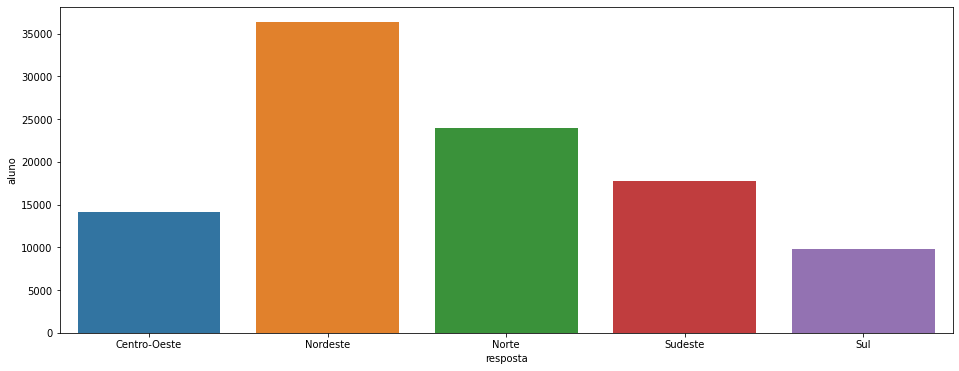

In [ ]:
por_regiao = alunoperguntas_resposta.query("cod_pergunta == 'REGEOGR'").groupby(['resposta']).count().reset_index()
plt.figure(figsize=(16, 6))
sns.barplot(data=por_regiao, x='resposta', y='aluno', )

In [ ]:
peso_regiao = alunoperguntas_resposta.query("cod_pergunta == 'VB11001' or cod_pergunta == 'REGEOGR' ").reset_index()
peso_regiao = peso_regiao.pivot(index=['aluno', 'escola', 'turma', 'anopesquisa', 'pais'], columns='pergunta', values='resposta').reset_index()
peso_regiao.columns=['aluno', 'escola', 'turma', 'anopesquisa', 'pais', 'peso', 'regiao']
peso_regiao = peso_regiao.groupby(['peso', 'regiao']).count().reset_index()
peso_regiao.head()

,peso,regiao,aluno,escola,turma,anopesquisa,pais
0,Gordo(a),Centro-Oeste,2415,2415,2415,2415,2415
1,Gordo(a),Nordeste,5110,5110,5110,5110,5110
2,Gordo(a),Norte,3313,3313,3313,3313,3313
3,Gordo(a),Sudeste,3134,3134,3134,3134,3134
4,Gordo(a),Sul,1947,1947,1947,1947,1947


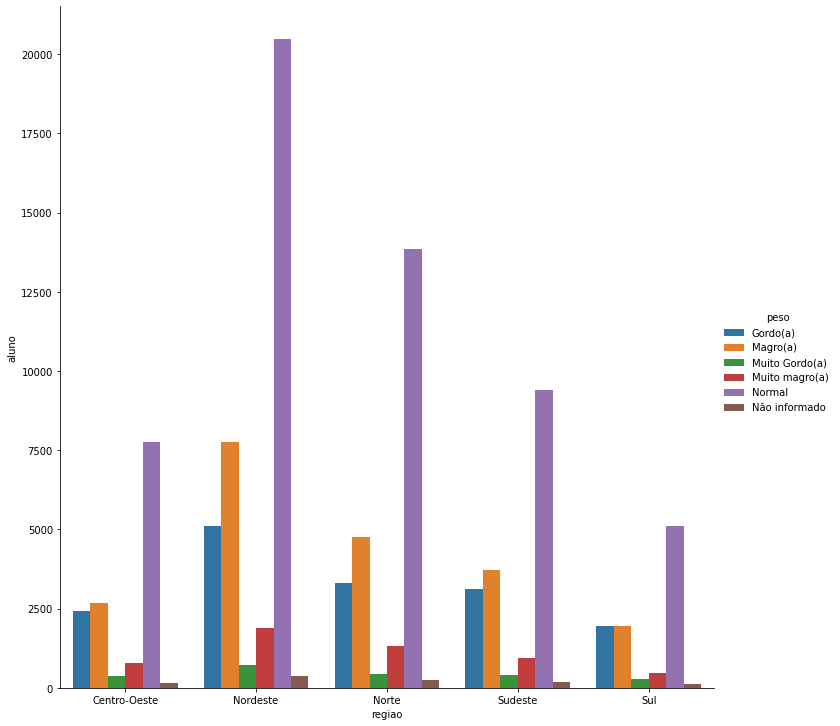

In [ ]:
sns.catplot(data=peso_regiao, x='regiao', y='aluno', hue="peso", kind="bar", height=10)

In [ ]:
peso_regiao_real = alunoperguntas_resposta.query("cod_pergunta == 'PESO' or cod_pergunta == 'REGEOGR' ").reset_index()
peso_regiao_real = peso_regiao_real.pivot(index=['aluno', 'escola', 'turma', 'anopesquisa', 'pais'], columns='pergunta', values='resposta').reset_index()
peso_regiao_real.columns=['aluno', 'escola', 'turma', 'anopesquisa', 'pais', 'peso', 'regiao']
peso_regiao_real = peso_regiao_real.groupby(['peso', 'regiao']).count().reset_index()
peso_regiao_real.head()

,peso,regiao,aluno,escola,turma,anopesquisa,pais
0,"1,069463",Norte,17,17,17,17,17
1,"1,331214",Norte,36,36,36,36,36
2,"1,387102",Norte,19,19,19,19,19
3,"1,429814",Norte,31,31,31,31,31
4,"1,466611",Norte,22,22,22,22,22


In [ ]:
estudo_morando_junto = alunoperguntas_resposta.query("cod_pergunta == 'VB01026' or cod_pergunta == 'VB01010A' ").reset_index()
estudo_morando_junto = estudo_morando_junto.pivot(index=['aluno', 'escola', 'turma', 'anopesquisa', 'pais'], columns='pergunta', values='resposta').reset_index()
estudo_morando_junto.columns=['aluno', 'escola', 'turma', 'anopesquisa', 'pais', 'morando', 'estudo']
estudo_morando_junto = estudo_morando_junto.sort_values(['morando', 'estudo'])
estudo_morando_junto.head()

,aluno,escola,turma,anopesquisa,pais,morando,estudo
3279,3280,110,2943,2015,76,1 pessoa (moro sozinho),Continuar estudando e trabalhar
4247,4248,149,2953,2015,76,1 pessoa (moro sozinho),Continuar estudando e trabalhar
5045,5046,170,471,2015,76,1 pessoa (moro sozinho),Continuar estudando e trabalhar
5903,5904,192,2510,2015,76,1 pessoa (moro sozinho),Continuar estudando e trabalhar
6782,6783,222,1840,2015,76,1 pessoa (moro sozinho),Continuar estudando e trabalhar


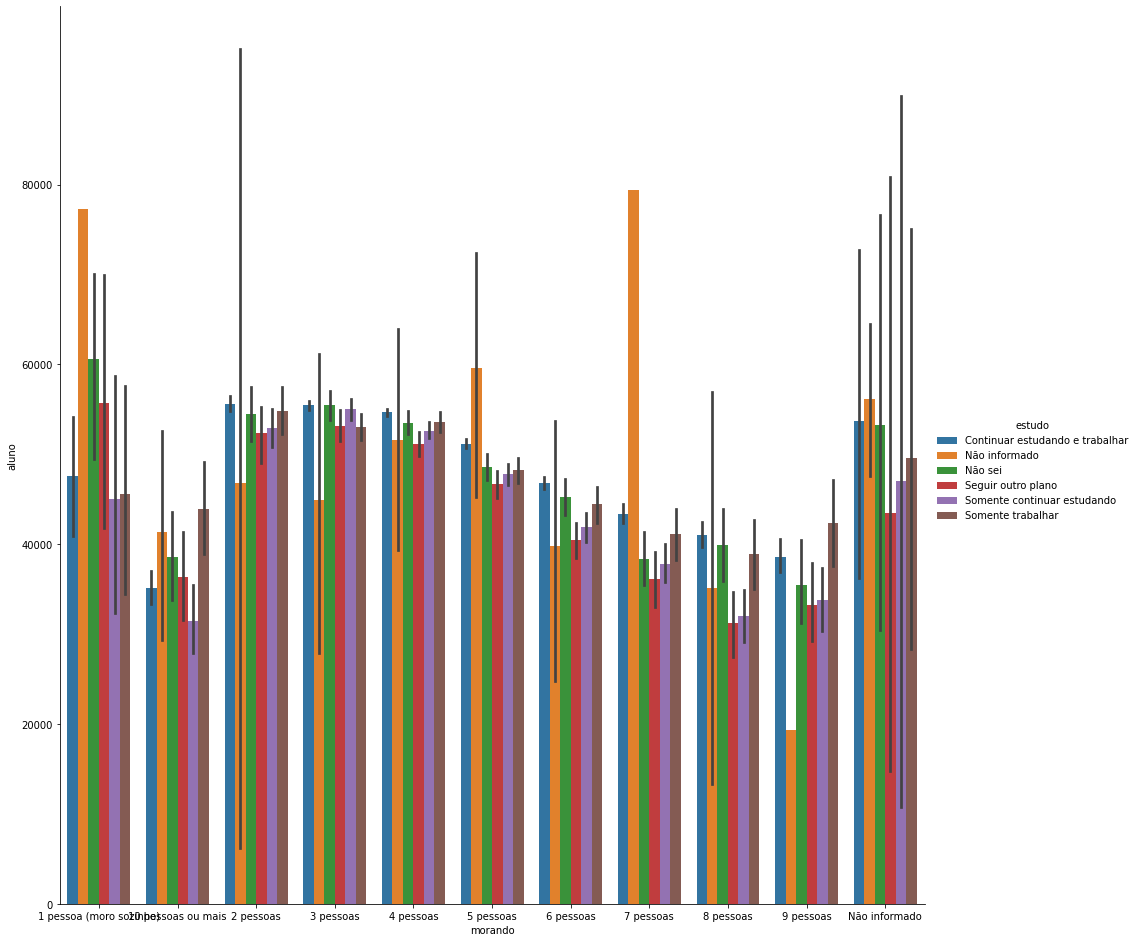

In [ ]:
#percebe se que continuar estudando e trabalhar aumenta até morando com 2 pessoas, depois começa a cair e seguir somente estudando começa a cair depois de 3 pessoas
sns.catplot(data=estudo_morando_junto, x='morando', y='aluno', hue="estudo", kind="bar", height=13)